# Practice 1: Tensor

## Question1. Autograd

아래의 그림과 같이 loss 함수를 구현하고자 한다. 구현 순서는 다음과 같다.

1) w와 b를 생성한다. 함수는 torch.randn을 사용한다.

2) w, x, b를 조합해서 z를 구한다.

3) 주어진 loss를 이용해서 backpropagation을 진행한다.

4) w와 b의 gradient를 출력한다.

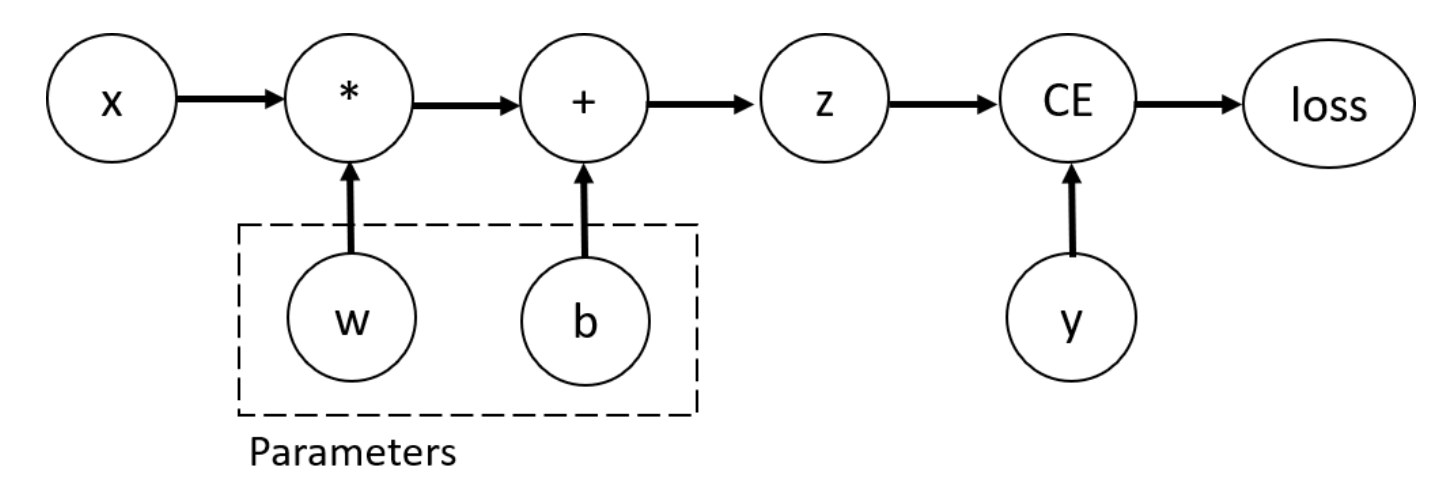

In [2]:
import torch

x = torch.ones(5)
y = torch.zeros(3)

# (1) Generate w and b
########## Your Code #########
w = torch.randn(5,3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
##############################

# (2) Compute z
z = torch.matmul(x, w) + b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

# (3) Backpropagation
########## Your Code #########
loss.backward()
##############################

# (4) Print the gradient of w and b
########## Your Code #########
print(f"gradient of w: {w.grad}")
print(f"gradient of b: {b.grad}")
##############################

gradient of w: tensor([[0.0196, 0.1927, 0.0080],
        [0.0196, 0.1927, 0.0080],
        [0.0196, 0.1927, 0.0080],
        [0.0196, 0.1927, 0.0080],
        [0.0196, 0.1927, 0.0080]])
gradient of b: tensor([0.0196, 0.1927, 0.0080])


## Question2: Tensor Operations

In [3]:
# (1) Make (5, 5) shaped tensor using "torch.rand"
########## Your Code #########
t1 = torch.rand(5,5)
##############################
print(t1.shape)

torch.Size([5, 5])


In [4]:
# (2) Change the device of t1 to cuda if GPU is available
########## Your Code #########
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
t1.cuda(device)
##############################
print(t1.device)

cpu


In [5]:
# (3) Change the shape of t1 into (5, 1, 5) and define the new tensor as t2
########## Your Code #########
t2 = t1.reshape(5,1,5)
##############################
print(t2.shape)

torch.Size([5, 1, 5])


In [6]:
# (4) Change the shape of t2 into (5, 5) and define the new tensor as t3
########## Your Code #########
t3 = t2.squeeze(1)
##############################
print(t3.shape)

torch.Size([5, 5])


## Question3: Reshape and Permute

In [7]:
# t1 is given for the below questions (1) & (2)
t1 = torch.arange(1, 7)
t1 = t1.reshape([2, 3])
print(t1)
print(t1.shape)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [8]:
expected_t2 = torch.Tensor([
    [1, 2],
    [3, 4],
    [5, 6]
])

# (1) Modify t1 to make tensor t2 identical to expected_t2 using "torch.reshape"
########## Your Code #########
t2 = t1.reshape(3,2)
##############################
print("Correct" if torch.all(t2 == expected_t2) else "Wrong")

Correct


In [10]:
expected_t2 = torch.Tensor([
    [1, 4],
    [2, 5],
    [3, 6]
])

# (2) Modify t1 to make tensor t2 identical to expected_t2 using "torch.permute"
########## Your Code #########
# t1 shape = [2,3] 0번째 dim 2 / 1번째 dim 3  shape = [2,3] shape[0] = 2, shape[1] =3
t2 = t1.T

##############################
print("Correct" if torch.all(t2 == expected_t2) else "Wrong")

Correct


## Question 4: Matrix Operations

In [11]:
# t1 and t2 are given for the below questions (1) & (2)
t1 = torch.arange(1, 7)
t1 = t1.reshape([2, 3])
print(f't1 :\n{t1}\n{t1.shape}\n')
t2 = torch.arange(1,13)
t2 = t2.reshape([4, 3])
print(f't2 :\n{t2}\n{t2.shape}')

t1 :
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])

t2 :
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
torch.Size([4, 3])


In [13]:
# (1) Compute matrix product of two tensors t1 and t2. The output shape should be (2,4).
########## Your Code #########
t3 = torch.matmul(t1, t2.T)
##############################
print(t3.shape)
print(t3)

torch.Size([2, 4])
tensor([[ 14,  32,  50,  68],
        [ 32,  77, 122, 167]])


In [25]:
# (2) Find the indices of the maximum value of each column in the tensor t3.
########## Your Code #########
max_idx = t3.argmax(dim=0)
##############################
print(max_idx)

tensor([1, 1, 1, 1])


# Practice 2

MNIST 데이터셋을 이용해, 손글씨를 분류하는 모델을 구현하고자 한다.

In [22]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12937105560024847107
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 13924827136
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5818810025124123365
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

## Question1: Dataset and Dataloader

In [23]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Question 1 is given question (You do not need to modify the codes)
# Run the codes to check the result.

# (1) Set dataset
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# (2) Set dataloader
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



example data shape:  torch.Size([64, 1, 28, 28])


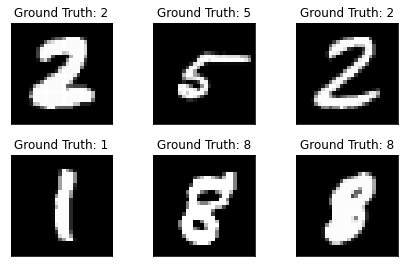

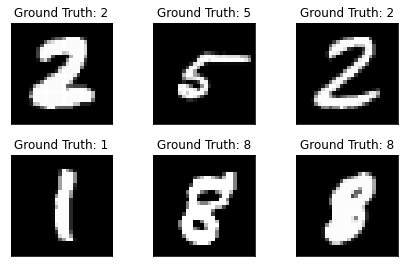

In [24]:
import matplotlib.pyplot as plt

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("example data shape: ", example_data.shape)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

## Question2: Build Model

아래의 정보를 활용해서, 모델을 구현하시오. Activation Function은 torch.nn.functional.relu를 사용한다.

- input shape: (1, 28, 28)
- fc1: Apply a linear transformation using nn.Linear function. Size of the output features should be 128
- fc2: Apply a linear transformation using nn.Linear function. Size of the output features should be 64
- classifier: Apply a linear transformation. Size of the output features should be 10

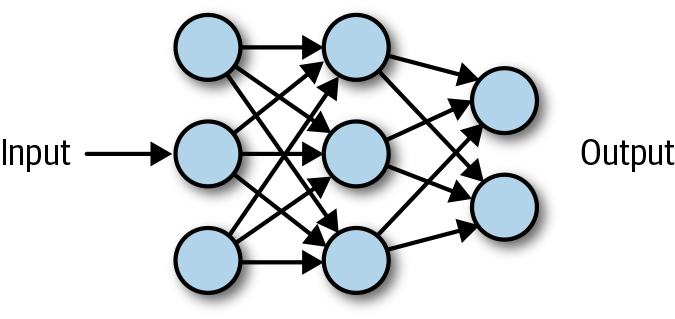

In [26]:
sample, label = next(iter(train_loader))
print(sample.shape)

torch.Size([64, 1, 28, 28])


In [27]:
sample = sample.reshape(64, -1)
print(sample.shape)

torch.Size([64, 784])


In [28]:
sample = torch.nn.Linear(784, 128)(sample)
print(sample.shape)

torch.Size([64, 128])


In [29]:
sample = torch.nn.functional.relu(sample)
print(sample.shape)

torch.Size([64, 128])


In [30]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    '''
    Define the model using below information.
    We need to use nn.ReLu between linear layers.
    - input shape: (1, 28, 28)
    - fc1: apply a linear transformation. output features should be 128
    - fc2: apply a linear transformation. output features should be 64
    - classifier: apply a linear transformation. output features should be the class size (10)

    * model : input -> fc1 -> relu -> fc2 -> relu -> classifier
    '''
    def __init__(self):
        super(Net, self).__init__()
        ########## Your Code ##########
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.classifier = nn.Linear(64,10)
        ###############################
    
    def forward(self, x):
        x = x.reshape(-1, 784)
        ########## Your Code ##########
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.classifier(x)
        ###############################
        return x

network = Net()
print(network)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (classifier): Linear(in_features=64, out_features=10, bias=True)
)


## Question3. Train the model

주어진 Dataloader와 모델 Net을 이용해서 모델을 Train하시오.

In [31]:
from tqdm import tqdm

def train(model, scheduler, optim, loss_fn, train_loader, epochs, device):
    for epoch in range(epochs):
        train_loss = 0.0

        # (1) Set the mode
        ########## Your Code ##########
        model.train()
        ##############################

        for batch in tqdm(train_loader):
            # (2) Initialize Gradients. (hint: use the argument optim and its method zero_grad)
            ########## Your Code #########
            optim.zero_grad()
            ##############################
            
            input, target = batch
            
            # (3) Change the device of the input and target to cuda
            ########## Your Code #########
            input = input.to(device)
            target = target.to(device)
            ##############################

            # (4) Get output using model and input
            ########## Your Code #########
            output = model(input)
            ##############################

            # (5) Get loss using loss_fn
            ########## Your Code #########
            loss = loss_fn(output, target)
            ##############################

            # (6) Do Backpropagation
            ########## Your Code #########
            loss.backward()
            ##############################

            # (7) Update the optimizer (hint: use the argument optim and its method step)
            ########## Your Code #########
            optim.step()
            ##############################
            
            train_loss += loss.data.item()
        
        # (8) Update the scheduler (hint: use the argument scheduler and its method step)
        ########## Your Code #########
        scheduler.step()
        ##############################
        train_loss /= len(train_loader.dataset)

        print(f'Epoch: {epoch+1}, Training Loss: {train_loss}')

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network.to(device)
print(f"device is {device}")

num_epochs = 3
optimizer = optim.SGD(network.parameters(), lr=1e-2, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

train(network, scheduler, optimizer, nn.CrossEntropyLoss(), train_loader, num_epochs, device)

device is cuda


100%|██████████| 938/938 [00:09<00:00, 99.40it/s] 


Epoch: 1, Training Loss: 0.008730705362434189


100%|██████████| 938/938 [00:06<00:00, 146.42it/s]


Epoch: 2, Training Loss: 0.003088222902081907


100%|██████████| 938/938 [00:06<00:00, 146.33it/s]

Epoch: 3, Training Loss: 0.0021895835405526063


## Question4: Test the model

모델 Net을 test 함수를 구현해서 평가하시오. 한 번의 Batch Iteration에서 구현되어야 할 코드의 순서는 아래와 같다.

1) input, target 텐서를 GPU에 업로드한다.

2) model을 이용해서 output을 구현하고, output과 target의 차이를 이용해서 accuracy를 구현한다.

In [33]:
def test(model, loss_fn, device):
    model.eval()
    test_loss = 0.0
    correct = 0
    
    with torch.no_grad():
        for batch in tqdm(test_loader):
            input, target = batch
            # (1) Change the device of the input and target to cuda
            ########## Your Code ##########
            input = input.to(device)
            target = target.to(device)
            ###############################
            
            # (2) Get output using the model
            ########## Your Code ##########
            output = model(input)
            ###############################

            # (3) Get accuracy using the output and target
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    print(f'Accuracy: ({100. * correct / len(test_loader.dataset)}%)\n')

In [34]:
test(network, nn.CrossEntropyLoss(), device)

100%|██████████| 157/157 [00:00<00:00, 165.07it/s]

Accuracy: (96.31999969482422%)

